# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**



### **Nombre:** Javier Alejandro Pérez Garza

### **Matrícula:** A01284386

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al. de ELSEVIER, que deberás descargar para contestar varias de las preguntas de esta actividad (el acceso es sin costo alguno):**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [ ]:
# Puedes incluir más librerías, de ser necesario:
from google.colab import drive
drive.mount('/content/drive')
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder, FunctionTransformer
from sklearn.feature_selection import SelectFromModel

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve


DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4030 - Inteligencia Artificial y Aprendizaje Automatico/Semana 7/"
os.chdir(DIR)

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

El método de Curvas de Aprendizaje permite evaluar el rendimiento y el comportamiento de un modelo en términos de puntuación de entrenamiento y puntuación de prueba. Se grafican la precisión del entrenamiento, o la metrica que se este utilizando para evaluar el modelo) y la validación en función de la cantidad de datos usados. A través de esta herramienta es posible visualizar y diagnosticar problemas de sesgo y varianza. Si el modelo muestra alto error en ambos conjuntos, hay subentrenamiento (sesgo alto), y si el error en validación es mucho mayor que en entrenamiento, hay sobrentrenamiento (variance alta). Esto ayuda a ajustar la complejidad del modelo y la cantidad de datos necesarios.

Scikit-learn developers. (n.d.). Plotting Learning Curves. Scikit-learn. Recuperado de https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al. de ELSEVIER, contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++
El objetivo principal del estudio fue implementar un modelo para predecir el rendimiento de las publicaciones y anuncios en la plataforma de redes sociales Facebook antes de su publicación.

A través de esto, se plantea proporcionar ventajas estratégicas a las empresas y a los equipos de mercadeo y publicidad para maximizar el impacto y el alcance de sus publicaciones con el objetivo de incrementar la audiencia de los posts en Facebook.


### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

#**Variable de Salida**
*   **Lifetime Post Consumers:** Número de personas que hicieron clic en algún lugar de la publicación.

#**Variables de Entrada**
*   **Page total likes:** Número de personas que han dado like o me gusta a la página de la empresa.
*   **Type:**  Tipo de contenido publicado.
*   **Category:** Caracterización manual del contenido.
  - *Acción*: Ofertas y concursos
  - *Producto*: Publicidad directa, contenido explícito de marca.
  - *Inspiración*: Contenido no explícito relacionado con la marca.
*   **Post Hour:** Hora en que se publicó el post en formato de 24 horas (0-23).
*   **Post Month:** Mes en que se publicó el post.
*   **Post Weekday:** Día de la semana en que se publicó el post.
*   **Paid:** Indica si la empresa pagó a Facebook por publicidad.

### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [ ]:
# Cargamos los datos del archivo:
data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')
print('Total de registros y variables:',data.shape)
data.head(3).T

Total de registros y variables: (500, 19)


,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Post Hour,3,10,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177


## **Ejercicio 3**

### **Variables temporales**

### **Recordemos que las varaibles temporales pueden tratarse como variables categóricas o numéricas, dependiendo del contexto. En nuestro caso las variables mes, día de la semana y hora en que se puso el post, podríamos considerarlas como variables categóricas ordinales. Sin embargo, para recordar cómo se transforman en cada uno de estos casos (numéricas y categóricas), consideraremos las variables de mes y día de la semana como categóricas ordinales y la variable hora como una variable cíclica.**

### **En la Tabla 3 del artículo de ELSEVIER nos comentan que la variable Post_hour está etiquetada de 0 a 23, por lo que las 24 horas serían las 0 horas, es decir tiene un comportamiento cíclico de 24 horas, que en términos matemáticos se dice que es una variable cíclica módulo 24. Así, las 24 horas será equivalente a las 0 horas**

### **La manera de transformar una variable T cíclica módulo M, es sustituyendo la columna original de la variable T por las siguientes dos columnas. Es lo que se llama ingeniería de características (feature engineering) dentro del área de ciencia de datos:**

$Tsin = sin(2*\pi*T/M)$

$Tcos = cos(2*\pi*T/M)$

#### NOTA: Donde se indica None, podrás agregar las líneas de código que consideres necesarias.

In [ ]:
# Ejercicio 3a:

# Define las dos nuevas variables, "horas_sin" y "horas_cos" a partir de la
# variable "Post Hour" y de acuerdo a como se indicó previamente:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

data['horas_sin'] = np.sin(2 * np.pi * data['Post Hour'] / 24)
data['horas_cos'] = np.cos(2 * np.pi * data['Post Hour'] / 24)


# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++

In [ ]:
# Ejercicio 3b:

# Agrega estas dos nuevas variables al DataFrame de tus datos
# y elimina la columna de la variable original "Post Hour":

# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

data = data.drop(columns=['Post Hour'])

# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++


# Veamos lo que tenemos hasta el momento:
data.head(3).T

,0,1,2
Page total likes,139441,139441,139441
Type,Photo,Status,Photo
Category,2,2,3
Post Month,12,12,12
Post Weekday,4,3,3
Paid,0.0,0.0,0.0
Lifetime Post Total Reach,2752,10460,2413
Lifetime Post Total Impressions,5091,19057,4373
Lifetime Engaged Users,178,1457,177
Lifetime Post Consumers,109,1361,113


In [ ]:
# De las Tablas 2 y 3 del artículo de ELSEVIER seleccionamos las variables que
# trabajaremos en esta Actividad.

# Separamos los datos de entrada (ver Tabla 3 del artículo) y de la variable de salida (ver Tabla 2):
X = data[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday', 'Paid', 'horas_sin', 'horas_cos']]
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de ELSEVIER.


# Particionamos en Train, Validation y Test en 70-15-15:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=7)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (350, 8) (350, 1)
Val: (75, 8) (75, 1)
Test: (75, 8) (75, 1)


In [ ]:
Xtrain.describe(include='all').T   # Veamos alguna descripción como datos numéricos del conjunto de entrenamiento.
                                   # En particular, las desviaciones estándar (std) desplegadas son las muestrales.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Page total likes,350.0,NaN,NaN,NaN,123412.534286,16145.534825,81370.0,111972.0,129600.0,136393.0,139441.0
Type,350,4,Photo,301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,350.0,NaN,NaN,NaN,1.9,0.862295,1.0,1.0,2.0,3.0,3.0
Post Month,350.0,NaN,NaN,NaN,7.088571,3.309383,1.0,4.0,7.0,10.0,12.0
Post Weekday,350.0,NaN,NaN,NaN,4.151429,2.047414,1.0,2.0,4.0,6.0,7.0
Paid,349.0,NaN,NaN,NaN,0.286533,0.452791,0.0,0.0,0.0,1.0,1.0
horas_sin,350.0,NaN,NaN,NaN,0.443653,0.45043,-1.0,0.258819,0.5,0.707107,1.0
horas_cos,350.0,NaN,NaN,NaN,-0.191939,0.75209,-1.0,-0.866025,-0.5,0.707107,0.965926


### **Ajuste variable categórica en Pipeline**

#### **Veamos un ejemplo de cómo ajustar una variable categórica en la cual uno de sus niveles no tiene suficiente información, por ejemplo, que no tenga al menos un 5% de información cada nivel. Entonces reagruparemos los niveles más pequeños hasta obtener un 5% y esto mediante una función que podamos usar dentro del Pipeline, para evitar el filtrado de información.**

In [ ]:
# Obtengamos las etiquetas únicas de data['Type'] ordenadas de mayor a menor frecuencia:
Xtrain['Type'].unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [ ]:
Xtrain['Type'].value_counts() / Xtrain.shape[0]   # Siguiendo la política de que cada nivel de una variable tenga
                                                  # al menos el 5% de información, agruparemos los casos "Link"
                                                  # y "Video" en un nuevo nivel que podría interpretarse como "Otros".

,count
Type,
Photo,0.860000
Status,0.082857
Link,0.045714
Video,0.011429


In [ ]:
# Definimos la función que llevará a cabo esta transformación dentro del Pipeline:

def mi_type(x):
  x = x.values.ravel()  # Convertimos a un arreglo 1D
  x = pd.Series(x, name='Type')  # seleccionamos la columna como datos tipo Series
  x.loc[:] = x.map({'Photo':1, 'Status':2, 'Link':0, 'Video':0})  # Podrías etiquetarlos también como 3, en lugar de 0.
  return x.values.reshape(-1, 1)    # Ajustamos la dimensión a un vector columna.

### **Transformación en la Variable de Salida**



In [ ]:
ytrain.describe().T   # Información de la variable de salida.

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,350.0,780.517143,770.963085,9.0,336.75,543.0,959.0,5934.0


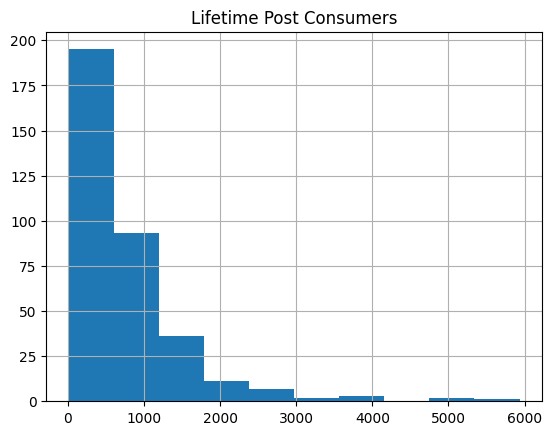

In [ ]:
# Observamos a continuación que hay un claro sesgo positivo en la variable de salida:
ytrain.hist();

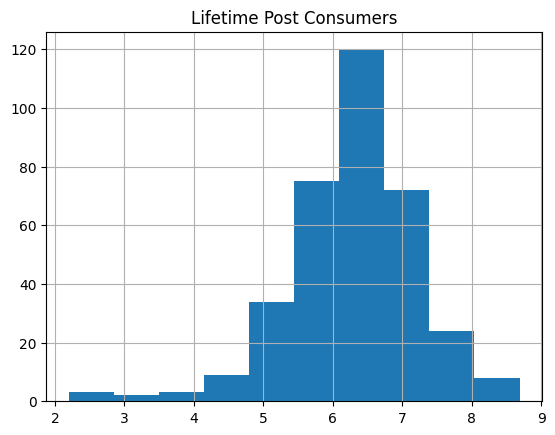

In [ ]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [ ]:
# Para una primera aproximación, podemos decir que se ajusta de manera aceptable
# la distribución con logaritmo a una acampanada.
# Procedemos entonces de la misma manera con Val y Test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [ ]:
# Aplicaremos lo mínimo de transformaciones.
# Las nuevas variables horas_sin y horas_cos ya están escaladas entre -1 y +1, por
# lo que podemos dejarlas así y solamente cuidar sus posibles datos perdidos.

num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ('scaler', MinMaxScaler())
                             ])
num_pipe_nombres = [0]   # ['Page total likes']  puedes indicar solamente el índice de la columna.


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4]   # ['Post Month', 'Post Weekday']


# Transformación del factor categórico de entrada "Type":
catMap_pipe = Pipeline(steps = [('catMap', FunctionTransformer(mi_type))])
catMap_pipe_nombres = ['Type']


# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('NomImp', SimpleImputer(strategy='most_frequent')),
                             ('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,5]  # ['Type', 'Category', 'Paid']


# Variables numéricas con la hora:
hora_pipe = Pipeline(steps = [('HoraImp', SimpleImputer(strategy='mean'))])
hora_pipe_nombres = [6,7]   # ['horas_sin', 'horas_cos']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres),
                                                        ('catmap', catMap_pipe, catMap_pipe_nombres),
                                                        ('hora', hora_pipe, hora_pipe_nombres)
                                                        ],
                                        remainder='passthrough')



# Solo para saber la nueva cantidad de columnas después de las trasnformaciones:
XtrainT = columnasTransformer.fit_transform(Xtrain)  # Ajustamos con Train...
print('Variables de entrada original:', Xtrain.shape)
print('Variables de entrada transformadas:', XtrainT.shape)

Variables de entrada original: (350, 8)
Variables de entrada transformadas: (350, 12)


### **Criterio para determinar si un modelo está subentrenado en un problema de Regresión:**

In [ ]:
# Existen varios criterios para determinar si un modelo de regresión está
# subentrenado, veamos a continuación unos de ellos.

# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std(ddof=1))        # Usemos la desviación estándar muestral
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std(ddof=1))    # ajustando los grados de libertad.

Desv-Est y-original: 770.963
Desv-Est y-logaritmo: 0.916


#### **Recordemos que la desviación estándar está en las mismas unidades de la variable original, por lo que en este caso tendríamos que la desviación estándar nos habla de aproximadamente 771 personas que dieron click en alguna parte del post.**

#### **En esta activiad estaremos comparando los errores en términos del logaritmo de la variable de salida, por lo que nuestro valor de referencia será el valor que obtienes en Desv_Est y_logaritmo=0.916 (aproximadamente). Así, los errores RMSE de los valores de predicción y los reales de los modelos que estarás obteniendo, deberán ser menores a este valor para no considerarlos subentrenados.**

#### **NOTA sobre los grados de libertad ddof (delta degree of freedom):**

Ver documentación: https://numpy.org/doc/stable/reference/generated/numpy.std.html

#### **Estricamente, desde el punto de vista matemático las desviaciones estándar que uno calcula deben ser las muestrales, es decir, std(ddof=1). Sin embargo, en la práctica es muy común usar la función con su valor predeterminado que es ddof=0 y que se traduce a calcular la desviación estándar poblacional. Repito, en la práctica suele pasarse por alto este ajuste porque cuando se tienen datos de miles o más regitros, la diferencia entre el resultado problacional y el muestral es mínima. En esta actividad lo pongo solamente para recordarlo y en dado caso cuando tengas menos de 100 registros sí hacer este ajuste, porque la diferencia entre ambos ya podría ser importante.**

In [ ]:
# Como se va a utilizar Validación-Cruzada, concatenamos los conjuntos de entrenamiento y validación
# en uno nuevo conjunto aumentado que llamaremos trainval para utilizar como entrenamiento:

Xtrainval = pd.concat([Xtrain, Xval], axis=0)
ytrainvallog = pd.concat([ytrainlog, yvallog], axis=0)

## **Ejercicio 4**


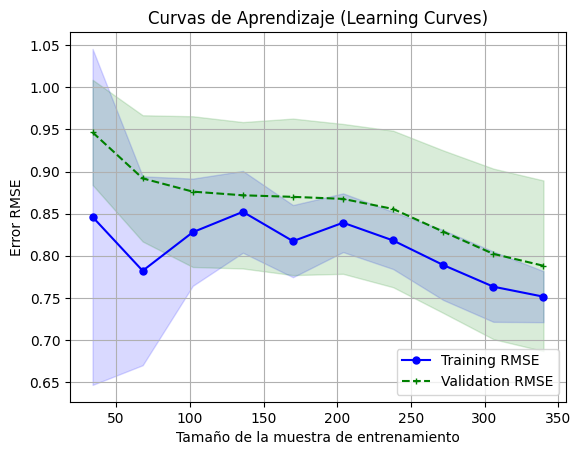

In [ ]:
# Ejercicio 4a.

# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=1500,
                                        max_depth=4,
                                        min_samples_split=35,
                                        min_samples_leaf=18,
                                        max_features=0.55,
                                        bootstrap=True,
                                        oob_score=True,
                                        random_state=42)



# +++++++++++++ Tesrmina sección de agregar código +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xtrainval,
                                                        y=np.ravel(ytrainvallog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1, ddof=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Curvas de Aprendizaje (Learning Curves)')
plt.xlabel('Tamaño de la muestra de entrenamiento')
plt.ylabel('Error RMSE')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Ejercicio 4b.

# Una vez que verifiques que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de tus mejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=1500,
                                        max_depth=4,
                                        min_samples_split=35,
                                        min_samples_leaf=18,
                                        max_features=0.55,
                                        bootstrap=True,
                                        oob_score=True,
                                        random_state=42)

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++


mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(pd.DataFrame(Xtrainval, columns=Xtrain.columns), np.ravel(ytrainvallog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.718


## **Ejercicio 5**

### **Repite el mismo proceso del Ejercicio 4 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenados, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

In [ ]:
# Incluye a continuación las celdas y líneas de código que consideres necesarias
# para responder el Ejercicio 5a, 5b y 5c.


def learningcurve(columnasTransformer, model, Xcv, ycv):
  mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', model)])

  train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=Xcv,
                                                        y=np.ravel(ycv),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)

  rmse_train_scores = np.sqrt(-train_scores)
  rmse_val_scores = np.sqrt(-val_scores)

  train_mean = np.mean(rmse_train_scores, axis=1)
  train_std = np.std(rmse_train_scores, axis=1, ddof=1)   # aquí también hacemos el ajuste de la desviación estándar muestral.
  val_mean = np.mean(rmse_val_scores, axis=1)
  val_std = np.std(rmse_val_scores, axis=1, ddof=1)


  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training RMSE')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

  plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation RMSE')
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

  for i in range(len(train_sizes)):
        plt.text(train_sizes[i], train_mean[i], f'{train_mean[i]:.2f}', color='blue', fontsize=8, ha='right')
        plt.text(train_sizes[i], val_mean[i], f'{val_mean[i]:.2f}', color='green', fontsize=8, ha='left')


  plt.title('Curvas de Aprendizaje (Learning Curves)')
  plt.xlabel('Tamaño de la muestra de entrenamiento')
  plt.ylabel('Error RMSE')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()


In [ ]:
def RMSE(model, columnasTransformer, Xcv, ycv, Xtrain, Xtest):
  mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', model)])
  mipipe.fit(pd.DataFrame(Xcv, columns=Xtrain.columns), np.ravel(ycv))
  yhattest_RF = mipipe.predict(Xtest)
  print('Error RSME(Test): %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

**a. Extreme Gradient Boost XGBoost**

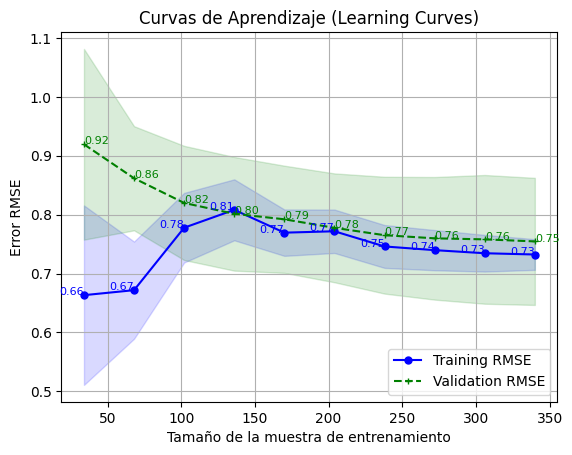

In [ ]:
modelo_xgb = XGBRegressor(
    booster='gblinear',
    eval_metric='rmse',
    predictor='cpu_predictor',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    random_state=1
)
learningcurve(columnasTransformer, modelo_xgb, Xtrainval, ytrainvallog)


In [ ]:
mejor_modelo = XGBRegressor(
    booster='gblinear',
    eval_metric='rmse',
    predictor='cpu_predictor',
    n_estimators=500,
    max_depth=6,
    learning_rate=0.05,
    random_state=1
)
RMSE(mejor_modelo, columnasTransformer, Xtrainval, ytrainvallog, Xtrain, Xtest)

Error RSME(Test): 0.729


**b. Máquina de Vector Soporte SVM**

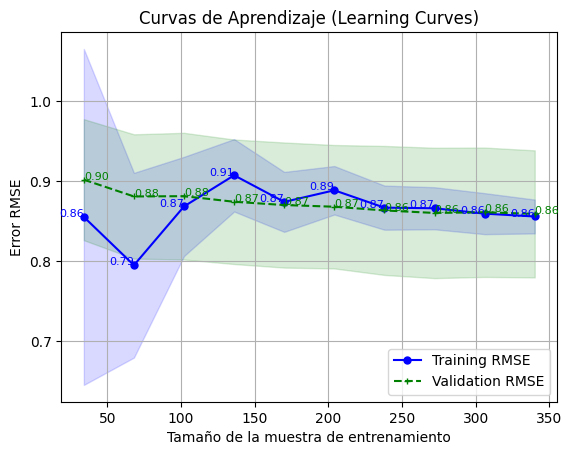

In [ ]:
modelo_svm = SVR(
        kernel='rbf',
        C=0.05,
        gamma='scale',
        epsilon=0.05
    )
learningcurve(columnasTransformer, modelo_svm, Xtrainval, ytrainvallog)



In [ ]:
mejor_modelo =SVR(
        kernel='rbf',
        C=0.05,
        gamma='scale',
        epsilon=0.05
    )
RMSE(mejor_modelo, columnasTransformer, Xtrainval, ytrainvallog, Xtrain, Xtest)

Error RSME(Test): 0.757


**c. Red Neuronal Perceptrón Multicapa MLP**

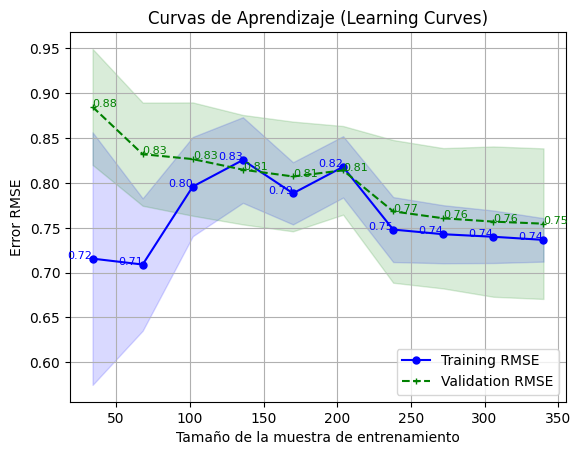

In [ ]:
modelo_mlp = MLPRegressor(
        max_iter=1000,
        activation='logistic',
        hidden_layer_sizes=(100,),
        learning_rate='adaptive',
        random_state=42
    )
learningcurve(columnasTransformer, modelo_mlp, Xtrainval, ytrainvallog)

In [ ]:
mejor_modelo = MLPRegressor(
        max_iter=1000,
        activation='logistic',
        hidden_layer_sizes=(100,),
        learning_rate='adaptive',
        random_state=42
    )
RMSE(mejor_modelo, columnasTransformer, Xtrainval, ytrainvallog, Xtrain, Xtest)

Error RSME(Test): 0.738


## **Ejercicio 6**

### **Importancia de características**

#### **Ejercicio 6a.**

*   **Con base al mejor modelo encontrado, realiza una análisis de importancia de características con el conjunto de prueba (Test).**

*   **Obtener un diagrama de cajas o algún tipo de visualización para mostrar estos resultados.**


#### **Ejercicio 6b.**

*   **Con base a los gráficos obtenidos indica cuáles son los tres factores más importantes y que dan mayor información para la predicción de la variable de salida.**

*  **Compara tus resultados con el resultado de la Figura 6 del artículo de ELSEVIER. Indica tus coincidencias y diferencias.**

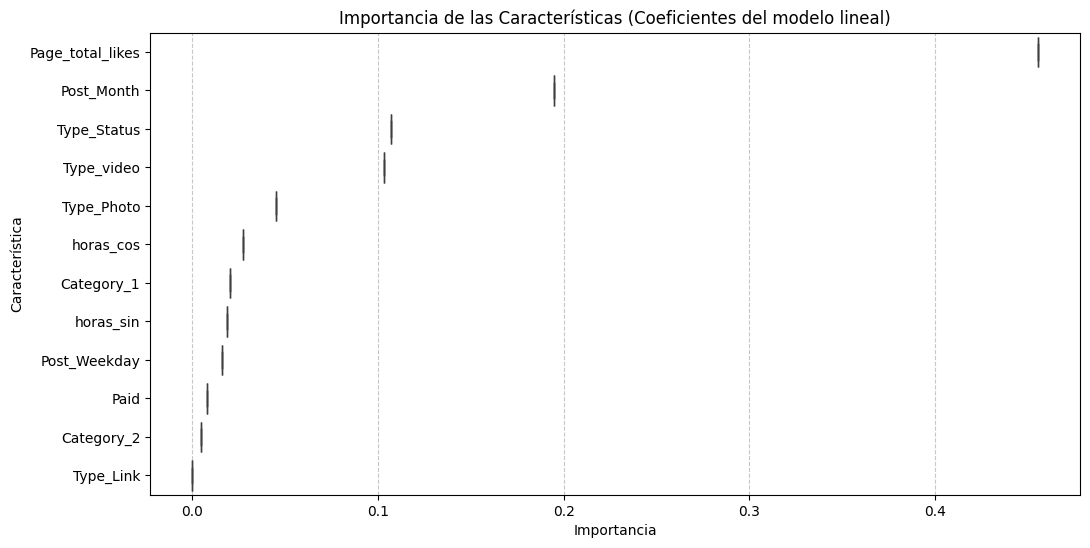


Feature Importances:
Page_total_likes: 0.4553
Post_Month: 0.1949
Type_Status: 0.1072
Type_video: 0.1030
Type_Photo: 0.0448
horas_cos: 0.0273
Category_1: 0.0203
horas_sin: 0.0185
Post_Weekday: 0.0161
Paid: 0.0080
Category_2: 0.0046
Type_Link: 0.0000


In [ ]:
# ++++++++++++++ Incluye aquí tu código ++++++++++++++++++++++++++++++
mejor_modelo = RandomForestRegressor(n_estimators=1500,
                                        max_depth=4,
                                        min_samples_split=35,
                                        min_samples_leaf=18,
                                        max_features=0.55,
                                        bootstrap=True,
                                        oob_score=True,
                                        random_state=42)
# Fit the pipeline with the full transformer and model
pipeline = Pipeline([
    ('ct', columnasTransformer),
    ('model', mejor_modelo)
])

# Fit the pipeline
pipeline.fit(Xtrainval, ytrainvallog)
Xtest_transformed = pipeline.named_steps['ct'].transform(Xtest)


# Create simplified feature names
feature_names = [
    'Page_total_likes',
    'Post_Month',
    'Post_Weekday',
    'Type_Photo', 'Type_Status', 'Type_Link',
    'Category_1', 'Category_2',
    'Paid',
    'Type_video',
    'horas_sin',
    'horas_cos'
]

# Get feature importance
importances = pipeline.named_steps['model'].feature_importances_

# Create DataFrame with feature importances
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

# Create visualization
plt.figure(figsize=(12, 6))
sns.boxplot(y=importance_df['feature'], x=importance_df['importance'], orient='h')
plt.title('Importancia de las Características (Coeficientes del modelo lineal)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Print numerical values
print("\nFeature Importances:")
for idx, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

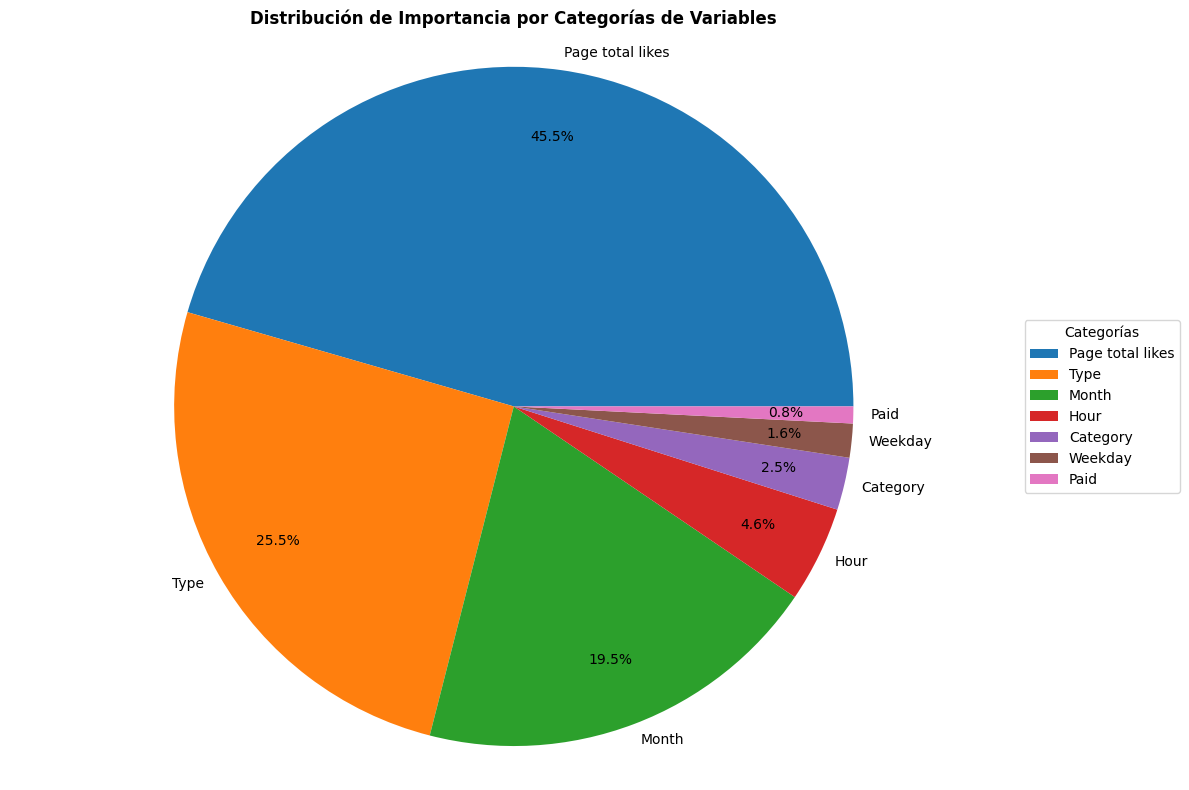


Importancia por Categorías:
Page total likes: 0.4553
Type: 0.2550
Month: 0.1949
Hour: 0.0457
Category: 0.0250
Weekday: 0.0161
Paid: 0.0080


In [ ]:
grouped_importances = {
    'Type': importance_df[importance_df['feature'].str.startswith('Type')]['importance'].sum(),
    'Category': importance_df[importance_df['feature'].str.startswith('Category')]['importance'].sum(),
    'Paid': importance_df[importance_df['feature'] == 'Paid']['importance'].sum(),
    'Hour': importance_df[importance_df['feature'].str.startswith('horas')]['importance'].sum(),
    'Month': importance_df[importance_df['feature'] == 'Post_Month']['importance'].sum(),
    'Weekday': importance_df[importance_df['feature'] == 'Post_Weekday']['importance'].sum(),
    'Page total likes': importance_df[importance_df['feature'] == 'Page_total_likes']['importance'].sum()
}

# Create DataFrame for the grouped importances
grouped_df = pd.DataFrame({
    'category': grouped_importances.keys(),
    'importance': grouped_importances.values()
}).sort_values('importance', ascending=False)

# Create pie chart
plt.figure(figsize=(12, 8))
plt.pie(grouped_df['importance'],
        labels=grouped_df['category'],
        autopct='%1.1f%%',
        startangle=0,
        pctdistance=0.8,
        labeldistance=1.05)

plt.title('Distribución de Importancia por Categorías de Variables', fontweight='bold')
plt.axis('equal')

# Add legend with both category names and importance values
legend_labels = [f"{cat}"
                for cat in grouped_df['category']]
plt.legend(legend_labels,
          title="Categorías",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Print the grouped values
print("\nImportancia por Categorías:")
for idx, row in grouped_df.iterrows():
    print(f"{row['category']}: {row['importance']:.4f}")
# +++++++++++++ Termina sección de agregar código +++++++++++++++++++++

### ++++++++ Inicia la sección de agregar texto: +++++++++++
### **Ejercicio 6b**

En mi caso, los tres factores más importantes y que dan mayor información para la predicción de la variable de salida son `Page total likes` con 45.5%, `Type` con 25.5% y `Month` con 19.5%, mientras que en la Figura 6 del artículo de ELSEVIER los tres factores más importantes son `Type` con 36%, `Page total likes` con 17% y `Month` con 15%.

En este caso se puede observar como se obtuvieron resultados similares a los del artículo; sin embargo, los porcentajes de los factores más importantes representan mayor importancia dentro del análisis realizado en esta libreta, ya que la variable que resultó más importante en la actividad fue `Page total likes` con 45.5% y la suma de los tres es de 90.5%, mientras que en el artículo la variable más importante fue `Type` con solo 36% y la suma de las tres variables más importantes fue de 68%. De todas maneras, aunque se intercambió el orden, en ambos casos, los tres factores más importantes fueron los mismos, por lo que con la dedicación y el tiempo adecuados, si es posible replicar los resultados del artículo.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 7**

### **Incluye tus conclusiones finales de la Actividad.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


*   **a. Random Forest:** Este es el modelo que dio el mejor resultado en términos de RSME con los datos de prueba, sin embargo, aún es posible mejorar la varianza del modelo, reduciendo la diferencia entre las curvas de aprendizaje de los datos de entrenamiento y validación.
*   **b. Extreme Gradient Boost XGBoost:** El modelo también da un buen desempeño, reduciendo la varianza que existe en el random forest, logrando una mejor generalización de los datos. Muestra un equilibrio entre sesgo y varianza, lo que sugiere un mejor ajuste. Sin embargo, aún puede mejorarse con una optimización más fina de hiperparámetros.
*   **c. Máquina de Vector Soporte SVM:** Aunque es el modelo que menor varianza presenta, es el que tiene el sesgo más alto, lo que indica que puede tener un ligero subentrenamiento. Aún así, debido a que tanto la curva de validación como entrenamiento no superan los grados de libertad ddof de 0.916 no consideraría que es grave este problema.
*   **d. Red Neuronal Perceptrón Multicapa MLP:** Aunque utilizando toda la muestra de datos de entrenamiento se obtiene un resultado muy similar al Extreme Gradient Boost, se puede observar que con menos datos tiene un comportamiento diferente, sugiriendo que el modelo tiene una mayor sensibilidad a la cantidad de información utilizada.


Finalmente, aunque por modelo XGBoost es el que ofrece un mayor equilibrio entre sesgo y varianza, para elegir el mejor modelo me basé en la minimización del Error RSME del modelo con los datos de prueba, por lo que para obtener la distribución de importancia de las variables utilice el modelo obtenido del Random Forest, obteniendo resultados similares a los del artículo.

Ahora bien, personalmente, aunque todavía es posible mejorar los hiperparametros, esta actividad me ha ayudado a comprender el uso de las curvas de aprendizaje para poder generar modelos sin subentrenamiento o sobrentrenamiento. De esta manera, también se reafirma el hecho de que para obtener los mejores modelos posibles, la elección de la metrica a optimizar también es de suma importancia para los análisis.

### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**